<a href="https://colab.research.google.com/github/minju2140/tensorflow/blob/main/3_%EB%8B%A4%EC%A4%91%EB%B6%84%EB%A5%98%2C_%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4_%ED%9A%8C%EA%B7%80%EC%99%80_Cross_Entropy%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## 샘플 데이터 생성

In [2]:
x = np.array([
    [14, 5, 30],
    [16, 6, 45],
    [5, 5, 45],
    [20, 6, 60],
    [10, 7, 55],
    [13, 10, 50],
], dtype=np.float32)

y = np.array([
    [1,0,0], # 말티즈
    [0,1,0], # 푸들
    [0,0,1], # 치와와
    [1,0,0], # 말티즈
    [0,1,0], # 푸들
    [0,0,1], # 치와와
], dtype=np.float32)

## 케라스 모델 생성
자동 임의 weight 초기화  
$$\text{softmax}(x_i) = \frac{\exp(x_i)}{\sum_{j=1}^K \exp(x_j)}$$


In [3]:
model = keras.Sequential([
    layers.Dense(units=3, input_shape=[3], activation='softmax') #유닛 3개로 설정, 인풋 역시 3, 활성화 함수는 소프트맥스 함수로
])
#모든 선은 weight를 가짐.
print(model.get_weights())

[array([[-0.33822274, -0.6463821 ,  0.5251396 ],
       [-0.80255175,  0.86361194,  0.21332955],
       [-0.32369685, -0.4048488 ,  0.33538294]], dtype=float32), array([0., 0., 0.], dtype=float32)]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 만약, 데이터를 잘 표현할 수 있는 소프트맥스 함수의 가중치를 찾고 싶다면..
배운대로, cross entropy를 비용함수로 설정하고 Gradient Decent를 사용하여 모델을 학습시킨 다음, 적합한 가중치를 찾아낼 수 있다.  

다중 분류인 경우 사용하는 cross entropy를 categorical cross entropy라고 부른다.  
$$ CE = -\frac{1}{N} \sum_{i=1}^{N} y_{i} \log(\hat{y}{i}) $$

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step - loss: 32.6459
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 15.8342
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 3.8486
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 5.8762
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 6.1646


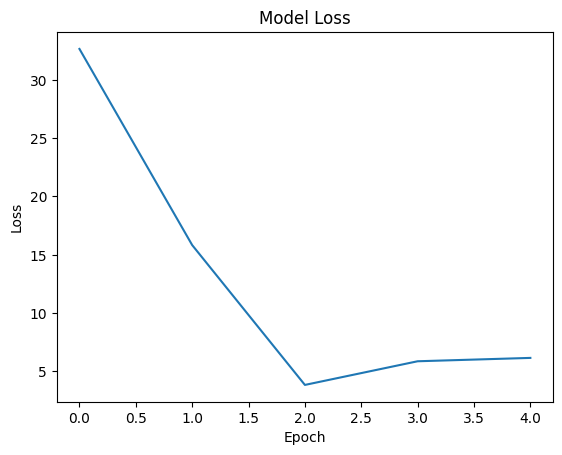

In [4]:
# 모델 컴파일 과정
sgd = keras.optimizers.SGD(learning_rate=0.01) # 경사하강법 learnig rate를 0.1로 설정하고
model.compile(optimizer=sgd, loss='categorical_crossentropy') # CCE를 비용함수로 설정

# 학습
history = model.fit(x, y, epochs=5)

# loss 시각화
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [6]:
# 새로운 데이터를 통한 label 예측
x_new = np.array([[12, 6, 35], [8, 5, 50]], dtype=np.float32)
y_pred = np.round(model.predict(x_new), 3)

# 모델이 예측한 label print
print(y_pred)

#[말티즈일 확률, 푸들일 확률, 치와와일 확률]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.095 0.862 0.043]
 [0.342 0.658 0.   ]]
